# **Loan Approval/Rejection Data Analysis**

## Objectives

The objective of this notebook is to explore and analyse a loan approval dataset to identify patterns and factors that influence loan approval decisions.

Specifically, this analysis aims to:
- Understand the structure and quality of the loan dataset
- Perform data cleaning and preprocessing where necessary
- Explore relationships between applicant attributes and loan approval outcomes
- Generate visual insights to support business decision-making

## Inputs

The inputs required to run this notebook are:
- A CSV file containing loan application data sourced from Kaggle
- Python libraries including pandas, numpy, matplotlib, and seaborn

## Outputs

The outputs generated by this notebook include:
- Cleaned and processed DataFrame(s)
- Summary statistics describing applicant and loan features
- Data visualisations highlighting patterns in loan approvals
- Analytical insights to support loan approval decision-making

## Additional Comments

This notebook is part of a data analytics project focused on financial decision analysis and follows the Code Institute assessment guidelines.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1: Data Loading and Initial Exploration (Extract)

In this section, I will load the loan approval dataset and perform an initial exploration to understand the structure, data types, and basic characteristics of the data.


In [2]:
# Import the pandas library for data manipulation
import pandas as pd 

# Load the dataset into a DataFrame
df = pd.read_csv("../data/loan_data.csv") 

# Display the first five rows of the DataFrame
df.head() 



,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
# Check the structure of the DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
# Check for missing values in each column
df.isna().sum() 
# There are no missing values in the dataset

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
# Check if there are any duplicate rows
has_duplicates = df.duplicated().any()
print("Are there any duplicate rows?", has_duplicates)

# Count how many duplicate rows exist
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Are there any duplicate rows? False
Number of duplicate rows: 0


### Data Cleaning including duplicate check
- Checked for missing values: None found.
- Verified data types: all columns are correctly formatted.
- Checked for duplicate rows in the dataset.
- No duplicates were found so no rows were needed to be removed.
- This confirms the dataset is clean and ready for analysis.




---

# Section 2: Feature engineering & EDA (Transform)

In this section i will look to feature engineer the dataset to add additional columns and create ratios that will enable me to perform more in depth exploraory data analysis which in turn will allow me to conclude my hypotheses.

First i will populate the dataset:

In [6]:
import pandas as pd 

df = pd.read_csv("../data/loan_data.csv") 
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Feature Engineering

Next, I will create new features to help me better understand factors that influence loan approval. 

1. **HighCreditScore**: A binary flag indicating whether an applicant has a high credit score (≥700). This can help me see if credit score significantly impacts approval chances.

2. **AgeGroup**: Categorizes applicants into 'Young', 'Middle-aged', and 'Senior'. Age can affect loan eligibility, as younger applicants may have less credit history.

3. **EmpExpLevel**: Categorizes employment experience into 'Junior', 'Mid', and 'Senior'. Applicants with more experience may be perceived as more financially stable.

4. **DebtToIncome**: Computes the ratio of requested loan amount to annual income. This complements the existing `loan_percent_income` column and can help analyze risk.

These engineered features alogside the preexisting features will be used in exploratory data analysis (EDA) and further modeling.


In [7]:
# Created a new feature: High Credit Score column (e.g., >=700)
df['HighCreditScore'] = df['credit_score'].apply(lambda x: 1 if x >= 700 else 0)


# Created a new feature: Age Group column
df['AgeGroup'] = df['person_age'].apply(lambda x: 'Young' if x < 35 else ('Middle-aged' if x < 60 else 'Senior'))


# Created a new feature: Employment Experience Level column
def emp_exp_level(exp):
    if exp < 2:
        return 'Junior'
    elif exp < 5:
        return 'Mid'
    else:
        return 'Senior'
    
df['EmpExpLevel'] = df['person_emp_exp'].apply(emp_exp_level)


# Debt-to-Income Ratio (I already have loan_percent_income, but creating this for ease of understanding)
df['DebtToIncome'] = df['loan_amnt'] / df['person_income']

df.head()



,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,HighCreditScore,AgeGroup,EmpExpLevel,DebtToIncome
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0,Young,Junior,0.486462
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0,Young,Junior,0.081420
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0,Young,Mid,0.442193
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0,Young,Junior,0.438855
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,0,Young,Junior,0.529221


### Exploratory Data Analysis (EDA) of Engineered Features

I will now explore how the newly created features relate to loan approval `loan_status(Loan approval status: 1 = approved; 0 = rejected)`:

1. **HighCreditScore**: I will check if applicants with high credit scores are approved more often.
2. **AgeGroup**: I'll explore whether age affects loan approval.
3. **EmpExpLevel**: I'll investigate the impact of employment experience on loan approval.
4. **DebtToIncome**: I'll examine how the debt-to-income ratio influences loan decisions.

I will use countplots and scatterplots to visualize these relationships.


#### Hypothesis #1 - Apllicants with a high credit (>=700) score are more likely to be accepted.

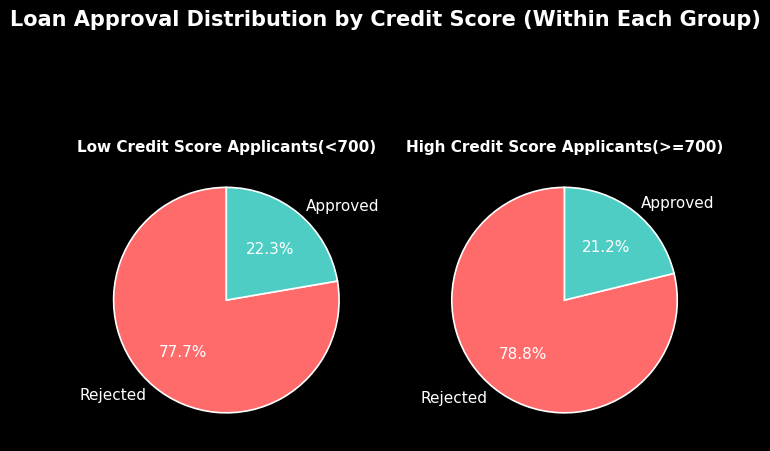

In [18]:
import matplotlib.pyplot as plt

# Dark background style
plt.style.use('dark_background')

# Map 0/1 to Approved/Rejected
status_labels = {0:'Rejected', 1:'Approved'}

# Compute normalized percentages per group
def get_group_percentages(df, score_col='HighCreditScore', target_col='loan_status', score_value=1):
    group = df[df[score_col]==score_value][target_col].value_counts(normalize=True)
    group = group.reindex([0,1], fill_value=0)
    return group

high_score_pct = get_group_percentages(df, score_value=1)
low_score_pct = get_group_percentages(df, score_value=0)

colors = ['#FF6B6B', '#4ECDC4']  # High contrast on dark background

fig, axes = plt.subplots(1, 2, figsize=(8,6), facecolor='black')

# Low Credit Score Pie Chart
axes[0].pie(
    low_score_pct,
    labels=[status_labels[i] for i in low_score_pct.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.2},
    textprops={'color':'white', 'fontsize':11}
)
axes[0].set_title("Low Credit Score Applicants(<700)", fontsize=11, fontweight='bold', color='white')

# High Credit Score Pie Chart
axes[1].pie(
    high_score_pct,
    labels=[status_labels[i] for i in high_score_pct.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.2},
    textprops={'color':'white', 'fontsize':11}
)
axes[1].set_title("High Credit Score Applicants(>=700)", fontsize=11, fontweight='bold', color='white')

plt.suptitle(
    "Loan Approval Distribution by Credit Score (Within Each Group)",
    fontsize=15,
    fontweight='bold',
    color='white'
)

plt.show()



### Loan Approval Distribution by Credit Score

I created a visual comparison of loan approval rates for applicants with **high** vs **low** credit scores.  

- **High Credit Score**: Applicants with a credit score ≥ 700  
- **Low Credit Score**: Applicants with a credit score < 700  

The pie charts show the proportion of **approved** vs **rejected** loans within each group.  

**Observations:**
- Both high and low credit score applicants have **very similar approval rates** (around 21–22%).  
- This suggests that, in this dataset, **credit score alone does not strongly influence loan approval**.  
- Other factors like income, employment experience, previous loan defaults, or loan-to-income ratio may have a stronger impact.  

The charts helped me quickly visualise distribution differences and highlight that **additional features should be investigated** to better understand what drives loan approvals.

I have also concluded that in the future I could bin the credit score into 3 segments (low(<300), medium(300-700), high(>700)) and see if any of those segments have a drastically different approval rate.


---

#### Hypothesis #2 - Applicants with higher income relative to requested loan amounts have a higher approval rate.

<Axes: xlabel='loan_status', ylabel='DebtToIncome'>

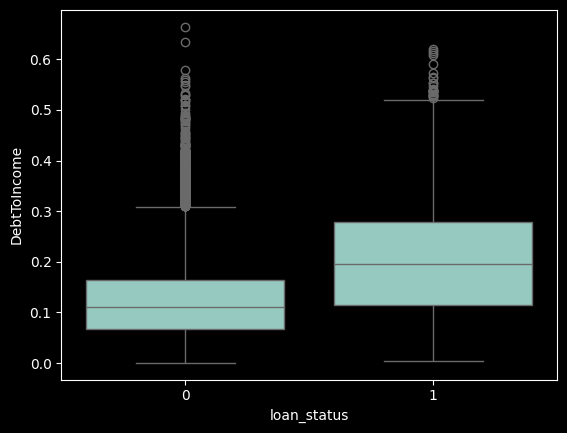

In [23]:
import seaborn as sns

df.groupby('loan_status')['DebtToIncome'].mean()
sns.boxplot(data=df, x='loan_status', y='DebtToIncome')



### Loan Approval Distribution by Debt-to-Income Ratio

I analysed whether applicants with lower debt-to-income (DTI) ratios are more likely to have their loans approved. A boxplot was created using Debt-to-Income Ratio (DTI) to compare the distribution of DTI values for approved vs rejected loans.

Loan Status:

* 0 = Rejected
* 1 = Approved

Observations:

* Approved loans tend to have a higher median DTI compared to rejected loans.
* The interquartile range (IQR) for approved loans is wider, suggesting greater variability in DTI among approved applicants.
* Rejected loans are more concentrated at lower DTI values, with fewer high-DTI outliers.

Conclusion:

Contrary to the initial hypothesis, lower debt-to-income ratios do not appear to guarantee loan approval in this dataset. This suggests that lenders may be considering other compensating factors, such as credit history, income stability, or loan purpose. This analysis highlights that DTI alone is insufficient to explain loan approval decisions and should be evaluated alongside additional features.

Based off of this analysis I will now analyse to see whether loan purpose has any impact on loan approval.

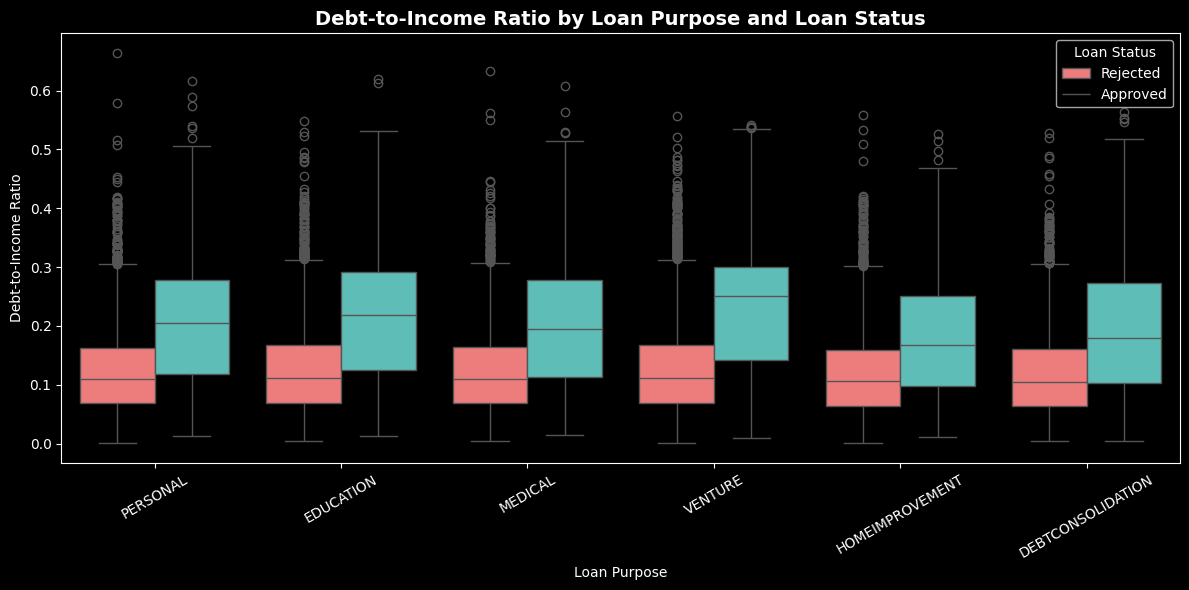

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.boxplot(
    data=df,
    x='loan_intent',
    y='DebtToIncome',
    hue='loan_status',
    palette={0:'#FF6B6B', 1:'#4ECDC4'}
)

plt.title(
    "Debt-to-Income Ratio by Loan Purpose and Loan Status",
    fontsize=14,
    fontweight='bold'
)
plt.xlabel("Loan Purpose")
plt.ylabel("Debt-to-Income Ratio")
plt.xticks(rotation=30)
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])

plt.tight_layout()
plt.show()


### How Debt-to-Income Ratio & Loan Purpose affect Approval Outcomes

To further investigate the relationship between debt-to-income ratio and loan approval, I extended the analysis by grouping applicants by loan purpose (loan_intent).

A grouped boxplot was created to show:

* Debt-to-income ratios across different loan purposes
* Loan approval status within each purpose

Observations:
* Certain loan purposes show higher approval rates even at higher DTI levels, indicating greater risk tolerance for specific intents.
* Other loan purposes appear to be more conservative, with approved loans clustering at lower DTI values.
* This suggests that loan intent moderates the impact of DTI on approval decisions.

Conclusion:

The relationship between debt-to-income ratio and loan approval is not uniform across all loan purposes. Loan intent plays a significant contextual role, helping explain why some high-DTI applicants are still approved.
By cross-referencing loan purpose with DTI, this analysis provides a more nuanced understanding of lender decision-making and supports the need for multivariate analysis rather than relying on a single financial metric.

---


#### Hypothesis #2 (Extended) - I want to take this analysis further to see if applicants' salary in conjunction with DTI and loan intent affects their chances of approval.

Raw income on its own will be quite challenging to interpret visually hence i will feature engineer my dataset once more to bin the income into multiple tiers. I have decided on 4 tiers (low income, lower-mid income, upper-mid income & high income).

In [27]:
df['IncomeBand'] = pd.cut(
    df['person_income'],
    bins=[0, 30000, 60000, 100000, df['person_income'].max()],
    labels=['Low Income', 'Lower-Mid Income', 'Upper-Mid Income', 'High Income']
)

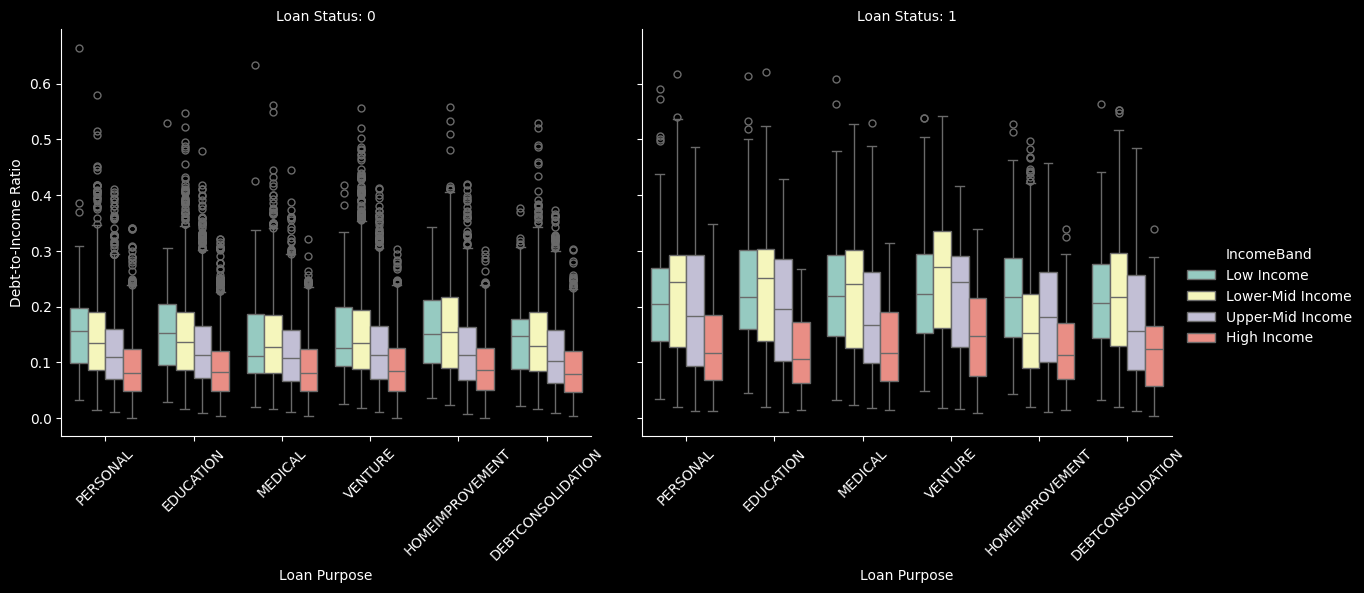

In [31]:
g = sns.catplot(
    data=df,
    x='loan_intent',
    y='DebtToIncome',
    hue='IncomeBand',
    col='loan_status',
    kind='box',
    height=5,
    aspect=1.2
)

g.set_titles("Loan Status: {col_name}")
g.set_axis_labels("Loan Purpose", "Debt-to-Income Ratio")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.show()


### Loan Approval vs Debt-to-Income Ratio, Loan Purpose, and Income (Faceted Analysis)

To further investigate whether applicants with higher income relative to their requested loan amounts are more likely to be approved, I created a **faceted multivariate visualisation**. This analysis combines:

- **Debt-to-Income Ratio** (financial burden)
- **Loan Intent** (reason for borrowing)
- **Person Income** (earning capacity)
- **Loan Approval Status** (Approved vs Rejected, shown as facets)

By faceting the plot by **loan approval status**, we can directly compare patterns between approved and rejected applicants while holding multiple variables in each view.

**Observations:**
- Approved applicants generally show **lower debt-to-income ratios**, particularly for loan intents such as *education* and *medical*.
- Rejected applicants tend to cluster at **higher debt-to-income ratios**, even when income levels are relatively high.
- Across most loan intents, approved applicants display **higher or more stable income distributions** compared to rejected applicants.
- Certain loan purposes appear more sensitive to income and debt burden, suggesting lenders may apply **different risk tolerances depending on loan intent**.

**Conclusion:**
This faceted multivariate analysis provides stronger evidence that loan approval is influenced by a combination of factors rather than income or debt-to-income alone. The interaction between income, loan purpose, and financial burden appears to play a significant role in approval decisions.
Faceting by approval clearly highlights the structural differences between approved and rejected applicants.

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [32]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)